# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno: Jorge Augusto de Lima e Silva - Vitor Emanuel Ferreira Vital**
### **Matrícula: 2021032005 - 202103----**


### **Tema: Mineração de Padrões Frequentes em Dados Financeiros Intraday: Uma Análise Abrangente de Preços de Ações, Pares de Moedas e Criptomoedas**
### **Base de dados: Huge Stock Price Data: Intraday Minute Bar** (https://www.kaggle.com/datasets/arashnic/stock-data-intraday-minute-bar)


In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter
import json
warnings.filterwarnings('ignore')

## **2. Data understanding (Entendimento dos dados)**


In [2]:
time_group = '15min' # intervalos de tempo que deverão ser considerados

In [3]:
try:
  oanda_data = pd.read_csv('oanda_data.csv.gz', index_col='date', compression='gzip')
except:

  try:
    import pyfinancialdata
  except:
    !pip3 install https://github.com/FutureSharks/financial-data/archive/master.zip
    import pyfinancialdata

  oanda_data = []
  instruments = ['AU200_AUD', 'AUD_JPY', 'AUD_USD', 'CORN_USD', 'DE10YB_EUR', 'EUR_JPY', 'EUR_USD', 'FR40_EUR', 'GBP_USD', 'JP225_USD', 'NAS100_USD', 'NATGAS_USD', 'SOYBN_USD', 'SPX500_USD',
                'SUGAR_USD', 'UK100_GBP', 'UK10YB_GBP', 'US2000_USD', 'USB02Y_USD', 'USB10Y_USD', 'USD_CAD', 'WHEAT_USD', 'WTICO_USD']

  for instrument in instruments:
    try:
      print('Loading: ', instrument)
      oanda_data.append(pyfinancialdata.get_multi_year(list(range(2005, 2021)), instrument, 'oanda', time_group=time_group))
      oanda_data[-1]['instrument'] = instrument
    except Exception as e:
      print(e)

  print('Loading:  NL25_EUR')
  oanda_data.append(pyfinancialdata.get_multi_year(list(range(2008, 2021)), 'NL25_EUR', 'oanda', time_group=time_group))
  oanda_data[-1]['instrument'] = 'NL25_EUR'

  print('Loading:  XAU_USD')
  oanda_data.append(pyfinancialdata.get_multi_year(list(range(2006, 2021)), 'XAU_USD', 'oanda', time_group=time_group))
  oanda_data[-1]['instrument'] = 'XAU_USD'

  oanda_data = pd.concat(oanda_data)
  oanda_data.to_csv('oanda_data.csv.gz', index=True, compression='gzip')

print(oanda_data.shape)
oanda_data.head()

(7337074, 6)


,close,high,low,open,price,instrument
date,,,,,,
2005-01-03 22:45:00,4034.0,4035.9,4032.0,4034.0,4034.0,AU200_AUD
2005-01-03 23:00:00,4041.9,4043.9,4034.0,4035.9,4041.9,AU200_AUD
2005-01-03 23:15:00,4041.9,4043.9,4039.9,4039.9,4041.9,AU200_AUD
2005-01-03 23:30:00,4047.9,4049.9,4043.9,4043.9,4047.9,AU200_AUD
2005-01-03 23:45:00,4049.9,4049.9,4049.9,4049.9,4049.9,AU200_AUD


In [4]:
try:
  histdata_data = pd.read_csv('histdata_data.csv.gz', index_col='date', compression='gzip')
except:

  try:
    import pyfinancialdata
  except:
    !pip3 install https://github.com/FutureSharks/financial-data/archive/master.zip
    import pyfinancialdata

  histdata_data = []
  instruments = ['ETXEUR', 'GRXEUR', 'JPXJPY', 'SPXUSD']

  for instrument in instruments:
    try:
      print('Loading: ', instrument)
      histdata_data.append(pyfinancialdata.get_multi_year(list(range(2010, 2019)), instrument, 'histdata', time_group=time_group))
      histdata_data[-1]['instrument'] = instrument
    except Exception as e:
      print(e)

  histdata_data = pd.concat(histdata_data)
  histdata_data.to_csv('histdata_data.csv.gz', index=True, compression='gzip')

print(histdata_data.shape)
histdata_data.head()

(610815, 6)


,close,high,low,open,price,instrument
date,,,,,,
2010-11-15 02:00:00,2810.0,2810.0,2803.0,2805.0,2810.0,ETXEUR
2010-11-15 02:15:00,2808.0,2809.0,2808.0,2809.0,2808.0,ETXEUR
2010-11-15 02:30:00,2806.0,2807.0,2805.0,2807.0,2806.0,ETXEUR
2010-11-15 02:45:00,2803.0,2806.0,2803.0,2805.0,2803.0,ETXEUR
2010-11-15 03:00:00,2799.0,2807.0,2797.0,2802.0,2799.0,ETXEUR


In [5]:
try:
  criptocurrency_data = pd.read_csv('criptocurrency_data.csv.gz', index_col='date', compression='gzip')
except:

  try:
    import pyfinancialdata
  except:
    !pip3 install https://github.com/FutureSharks/financial-data/archive/master.zip
    import pyfinancialdata

  criptocurrency_data = []
  print('Loading:  BTC_USD')
  criptocurrency_data.append(pyfinancialdata.get_multi_year(list(range(2012, 2019)), 'BTC_USD', 'bitstamp', time_group=time_group))
  criptocurrency_data[-1]['instrument'] = 'BTC_USD'
  print('Loading:  BTC_EUR')
  criptocurrency_data.append(pyfinancialdata.get_multi_year(list(range(2018, 2019)), 'BTC_EUR', 'kraken', time_group=time_group))
  criptocurrency_data[-1]['instrument'] = 'BTC_EUR'
  print('Loading:  ETH_EUR')
  criptocurrency_data.append(pyfinancialdata.get_multi_year(list(range(2018, 2019)), 'ETH_EUR', 'kraken', time_group=time_group))
  criptocurrency_data[-1]['instrument'] = 'ETH_EUR'

  criptocurrency_data = pd.concat(criptocurrency_data)
  criptocurrency_data.to_csv('criptocurrency_data.csv.gz', index=True, compression='gzip')

print(criptocurrency_data.shape)
criptocurrency_data.head()

(270122, 6)


,close,high,low,open,price,instrument
date,,,,,,
2012-01-01 00:00:00,4.58,4.58,4.58,4.58,4.58,BTC_USD
2012-01-01 00:15:00,4.58,4.58,4.58,4.58,4.58,BTC_USD
2012-01-01 00:30:00,4.58,4.58,4.58,4.58,4.58,BTC_USD
2012-01-01 00:45:00,4.58,4.58,4.58,4.58,4.58,BTC_USD
2012-01-01 01:00:00,4.58,4.58,4.58,4.58,4.58,BTC_USD


In [6]:
full_data = pd.concat([oanda_data, histdata_data, criptocurrency_data])
full_data['variation'] = full_data['close']/full_data['open']
print(full_data.shape)
full_data.head()

(8218011, 7)


,close,high,low,open,price,instrument,variation
date,,,,,,,
2005-01-03 22:45:00,4034.0,4035.9,4032.0,4034.0,4034.0,AU200_AUD,1.000000
2005-01-03 23:00:00,4041.9,4043.9,4034.0,4035.9,4041.9,AU200_AUD,1.001487
2005-01-03 23:15:00,4041.9,4043.9,4039.9,4039.9,4041.9,AU200_AUD,1.000495
2005-01-03 23:30:00,4047.9,4049.9,4043.9,4043.9,4047.9,AU200_AUD,1.000989
2005-01-03 23:45:00,4049.9,4049.9,4049.9,4049.9,4049.9,AU200_AUD,1.000000


(array([1.02594489e-05, 1.70990814e-05, 2.73585303e-05, 1.16273754e-04,
        2.39387140e-04, 1.77830447e-03, 2.31811324e+01, 4.91865679e+00,
        1.70648833e-03, 2.49646589e-04, 5.47170606e-05, 3.41981629e-05,
        3.07783466e-05, 1.02594489e-05, 6.83963257e-06, 1.02594489e-05,
        3.41981629e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.41981629e-06]),
 array([0.7515625 , 0.78714451, 0.82272652, 0.85830854, 0.89389055,
        0.92947256, 0.96505457, 1.00063659, 1.0362186 , 1.07180061,
        1.10738262, 1.14296464, 1.17854665, 1.21412866, 1.24971067,
        1.28529268, 1.3208747 , 1.35645671, 1.39203872, 1.42762073,
        1.46320275, 1.49878476, 1.53436677, 1.56994878, 1.6055308 ,
        1.64111281, 1.67669482, 1.71227683, 1.74785884, 1.78344086,
        1.81902287]),
 <BarContainer object of

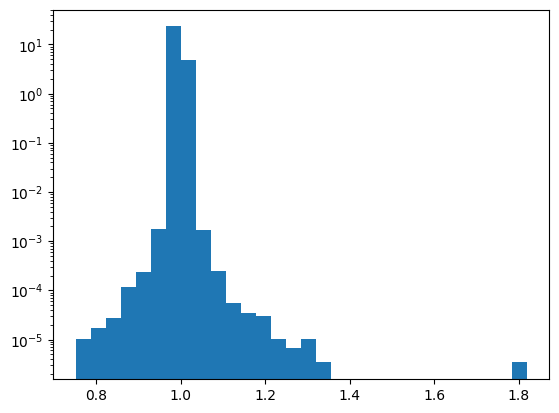

In [7]:
plt.hist(full_data['variation'], log=True, density=True, bins=30)

## **3. Data preparation (Preparação dos dados)**

In [8]:
full_data.set_index(pd.to_datetime(full_data.index), inplace=True)
grouped = full_data.groupby([pd.Grouper(freq='D'), 'instrument'])

In [16]:
valid_groups = [(l, g) for l, g in list(grouped) if len(g) == 96]
labels = [l[1] for l,_ in valid_groups]
print(json.dumps(dict(Counter(labels)), indent=2))
print(len(valid_groups))
valid_data = pd.concat([g for _,g in valid_groups])
valid_data['bin'] = pd.qcut(valid_data['variation'], q=3, labels=['a', 'b', 'c'])
print(valid_data.shape)
valid_data.head()

{
  "AUD_JPY": 3146,
  "AUD_USD": 3096,
  "EUR_JPY": 3145,
  "EUR_USD": 3141,
  "GBP_USD": 3132,
  "USD_CAD": 3106,
  "XAU_USD": 389,
  "SPXUSD": 21,
  "JPXJPY": 9,
  "BTC_USD": 2194,
  "BTC_EUR": 308,
  "ETH_EUR": 308
}
21995
(2111520, 8)


,close,high,low,open,price,instrument,variation,bin
date,,,,,,,,
2005-01-03 00:00:00,80.32,80.37,80.31,80.33,80.32,AUD_JPY,0.999876,b
2005-01-03 00:15:00,80.37,80.38,80.31,80.32,80.37,AUD_JPY,1.000623,c
2005-01-03 00:30:00,80.21,80.37,80.21,80.37,80.21,AUD_JPY,0.998009,a
2005-01-03 00:45:00,80.14,80.23,80.05,80.21,80.14,AUD_JPY,0.999127,a
2005-01-03 01:00:00,80.20,80.21,80.14,80.14,80.20,AUD_JPY,1.000749,c


In [17]:
print(json.dumps(valid_data['bin'].value_counts().to_dict(), indent=2))

{
  "a": 703841,
  "c": 703840,
  "b": 703839
}


In [21]:
print(valid_data[valid_data['bin'] == 'a']['variation'].min(), valid_data[valid_data['bin'] == 'a']['variation'].max())
print(valid_data[valid_data['bin'] == 'b']['variation'].min(), valid_data[valid_data['bin'] == 'b']['variation'].max())
print(valid_data[valid_data['bin'] == 'c']['variation'].min(), valid_data[valid_data['bin'] == 'c']['variation'].max())

0.7515625 0.9998207617625093
0.9998207619953087 1.0001899311183144
1.0001899318054372 1.8190228690228691


In [10]:
groups = valid_data.groupby([pd.Grouper(freq='D'), 'instrument'])
strings = [''.join(g['bin'].values) for _,g in groups]
len(strings)

21995

## **4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

In [11]:
class Node:
    __map = {'a': 0, 'b': 1, 'c': 2}
    __all_occurences = dict()
    __node_counter = 0

    def __init__(self, val) -> None:
        self.__sons = np.array([None for _ in range(3)], dtype=np.object_)
        self.__occurrences = 0
        self.__val = val
        Node.__node_counter += 1

    def insert(self, string):
        self.__occurrences += 1
        
        if string == '': return
        
        if self.__sons[self.__map[string[0]]] == None:
            self.__sons[Node.__map[string[0]]] = Node(string[0])
        return self.__sons[Node.__map[string[0]]].insert(string[1:])
    
    def __calc_occurences(self, preffix):
        Node.__all_occurences[preffix + self.__val] = self.__occurrences
        for i in range(3):
            if self.__sons[i] != None:
                self.__sons[i].__calc_occurences(preffix + self.__val)

    def get_occurences(self):
        self.__calc_occurences('')
        return self.__all_occurences

In [12]:
class SufixTree:
    def __init__(self) -> None:
        self.__root = Node('')

    def insert_word(self, string):
        for i in range(len(string)):
            self.__root.insert(string[i:i+10]) # iremos trabalhar apenas com intervalos de até 2 horas

    def get_occurences(self):
        return self.__root.get_occurences()

In [13]:
suf_tree = SufixTree()
for s in tqdm(strings):
    suf_tree.insert_word(s)

100%|██████████| 21995/21995 [00:07<00:00, 2935.79it/s]


In [14]:
frequencies = suf_tree.get_occurences(0)
print(json.dumps(frequencies, indent=2))

{
  "": 2111520,
  "a": 703841,
  "aa": 238779,
  "aaa": 83748,
  "aaaa": 30541,
  "aaaaa": 11672,
  "aaaaaa": 4799,
  "aaaaaaa": 2256,
  "aaaaaaaa": 1254,
  "aaaaaaaaa": 847,
  "aaaaaaaaaa": 657,
  "aaaaaaaaab": 58,
  "aaaaaaaaac": 127,
  "aaaaaaaab": 90,
  "aaaaaaaaba": 28,
  "aaaaaaaabb": 28,
  "aaaaaaaabc": 34,
  "aaaaaaaac": 309,
  "aaaaaaaaca": 109,
  "aaaaaaaacb": 65,
  "aaaaaaaacc": 134,
  "aaaaaaab": 214,
  "aaaaaaaba": 57,
  "aaaaaaabaa": 21,
  "aaaaaaabab": 15,
  "aaaaaaabac": 21,
  "aaaaaaabb": 56,
  "aaaaaaabba": 13,
  "aaaaaaabbb": 30,
  "aaaaaaabbc": 13,
  "aaaaaaabc": 98,
  "aaaaaaabca": 44,
  "aaaaaaabcb": 23,
  "aaaaaaabcc": 31,
  "aaaaaaac": 772,
  "aaaaaaaca": 300,
  "aaaaaaacaa": 132,
  "aaaaaaacab": 38,
  "aaaaaaacac": 129,
  "aaaaaaacb": 139,
  "aaaaaaacba": 40,
  "aaaaaaacbb": 47,
  "aaaaaaacbc": 52,
  "aaaaaaacc": 322,
  "aaaaaaacca": 138,
  "aaaaaaaccb": 47,
  "aaaaaaaccc": 135,
  "aaaaaab": 540,
  "aaaaaaba": 166,
  "aaaaaabaa": 67,
  "aaaaaabaaa": 23,
  "aaa

In [15]:
{f: frequencies[f] for f in frequencies if len(f) >= 4 and frequencies[f] >= int(21995 * 0.3)}

{'aaaa': 30541,
 'aaaaa': 11672,
 'aaaac': 13630,
 'aaab': 16035,
 'aaac': 36491,
 'aaaca': 14565,
 'aaacb': 7340,
 'aaacc': 14308,
 'aaba': 16889,
 'aabac': 6632,
 'aabb': 17184,
 'aabbb': 6841,
 'aabc': 19136,
 'aabca': 7007,
 'aaca': 38762,
 'aacaa': 14392,
 'aacab': 7519,
 'aacac': 16519,
 'aacaca': 6604,
 'aacacc': 6637,
 'aacb': 22168,
 'aacba': 7509,
 'aacbb': 6880,
 'aacbc': 7622,
 'aacc': 37601,
 'aacca': 15621,
 'aaccac': 6652,
 'aaccb': 7574,
 'aaccc': 14095,
 'abaa': 17498,
 'abaac': 7147,
 'abab': 16896,
 'abac': 20748,
 'abaca': 7466,
 'abacc': 7069,
 'abba': 18246,
 'abbab': 6883,
 'abbb': 32026,
 'abbba': 7083,
 'abbbb': 17007,
 'abbbbb': 10041,
 'abbbc': 7466,
 'abbc': 19312,
 'abbcb': 7352,
 'abca': 21275,
 'abcaa': 7029,
 'abcac': 7820,
 'abcb': 19493,
 'abcbb': 7803,
 'abcc': 19106,
 'abcca': 7382,
 'acaa': 37761,
 'acaaa': 13847,
 'acaab': 7399,
 'acaac': 16246,
 'acab': 22760,
 'acaba': 7452,
 'acabb': 7226,
 'acabc': 7908,
 'acac': 41941,
 'acaca': 16766,
 'acaca

## **5. Evaluation (Validação)**


**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.